# Bellabeat Case Study Slideshow 
## by Odafe-Ighele Jesse




## Investigation Overview



>The key insights answer the following questions;
- Do users get off their beds quickly?
- What Time of the Day are Users the most active?
- What is the relationship between the calories and total steps?
- Which day of the week are users the most active?
- How do users spend their time?
- Which BMI class covers the most distance and steps?

## Dataset Overview

- Today I'm going to analyze data of Bellabeat, a high-tech manufacturer of health-focused products for women. I followed total six steps: Ask, Prepare, Process, Analyze, Share & Act in following analysis. I used Python to analyze data and spreadsheet program (Microsoft Excel) to visualize data.
- I used 6 datasets provided by Bellabeat. The 6 datasets used different metrics to account for a User's activity such as Total steps, Total Distance, Calories, Heartrate ,etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the necessary datasets
sleepday = pd.read_csv("C:\\Users\\HP\\Downloads\\sleepDay_merged_clean.csv")
dailyactivities = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (1)\\dailyActivity_merged.csv')
dailyintensity = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\dailyIntensities_merged.csv")
dailycalories = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\dailyCalories_merged.csv")
weightlog = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\weightLogInfo_merged.csv")
heartrates = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\heartrate_seconds_merged.csv")

## Do users get off their beds quickly?

The distribution is right skewed hinting that the users are generally fast in getting off their beds 

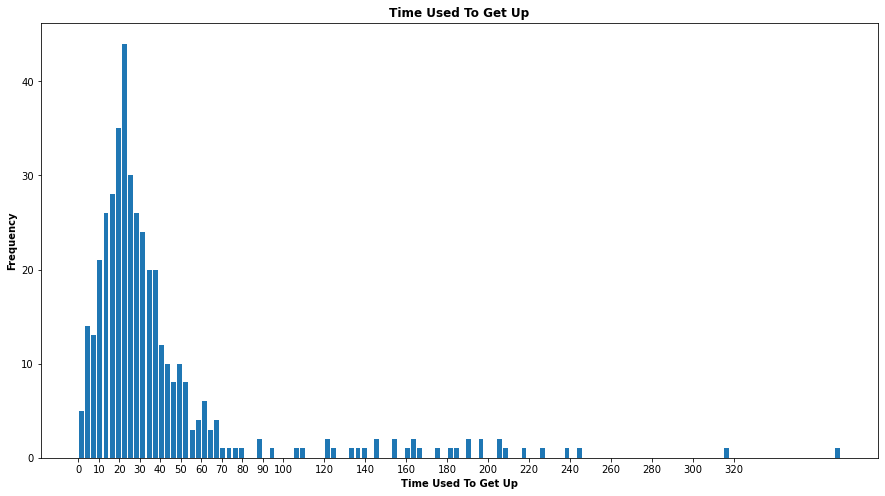

In [3]:
plt.figure(figsize=[15,8])
bins=np.arange(0,sleepday['TimeUsedToGetUp'].max()+3,3)
ticks = [0,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,220,240,260,280,300,320]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=sleepday,x='TimeUsedToGetUp',bins=bins,rwidth=0.8)
plt.title('Time Used To Get Up',y=1 ,fontweight = 'bold')
plt.xlabel('Time Used To Get Up',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

## What Time of the Day are Users the most active?

From the plot above we can see users are the most active in the afternoon with their activity peaking around 18:00 and the least active around 04:00

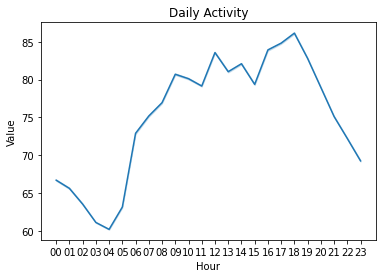

In [4]:
hours = pd.to_datetime(heartrates['Time']).dt.strftime('%H')
heartrates['Hour']=hours
heartrates = heartrates.sort_values('Hour')
sb.lineplot(data=heartrates,x='Hour',y='Value')
plt.title('Daily Activity');

## What is the relationship between the calories and total steps?

The relationship between the total steps and calories is a positive correlation hence when the steps increase the calories lost increases but it should also be noted that to lose a high amount of calories (> 4000 calories) the user must have at least 120 very active minutes.
Hence, the calories can be used as a measure of activity

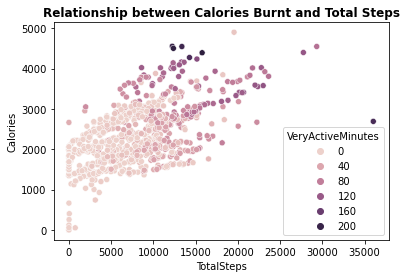

In [5]:
sb.scatterplot(data=dailyactivities,y='Calories',x='TotalSteps',hue='VeryActiveMinutes')
plt.title('Relationship between Calories Burnt and Total Steps',fontweight = 'bold');

## Which day of the week are users the most active?


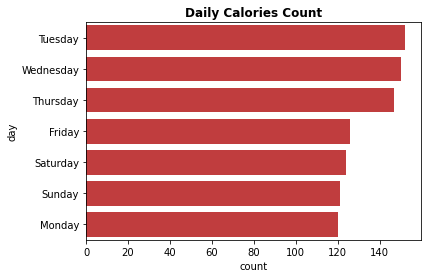

In [6]:
day = pd.to_datetime(dailycalories.ActivityDay).dt.day_name()
dailycalories['day'] = day
base_color=sb.color_palette()[3]
orders = dailycalories.day.value_counts().index
sb.countplot(y='day',data = dailycalories,color = base_color ,order = orders)
plt.title('Daily Calories Count',fontweight = 'bold');

## How do users spend their time?

Based on the donut chart,81% of the time Bellabeat users are sedentary (projected to take less than 5000 steps a day)while only 2% of the time Bellabeat users are very active(projected to take more than 10000 steps a day)

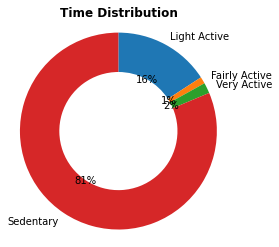

In [8]:
my_data = [15.820493214202166, 1.1130139975629088, 1.7366021081886969, 81.32989068004623]
my_labels = 'Light Active', 'Fairly Active', 'Very Active','Sedentary'
plt.pie(my_data, labels=my_labels,autopct='%1.0f%%',startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Time Distribution',fontweight = 'bold')
plt.axis('square')
plt.show();


## Step Class Distribution

The Very Active Users are the least users while the sedentary and lightly active users(< 7500 steps per day users) are a combined 64% of the total users

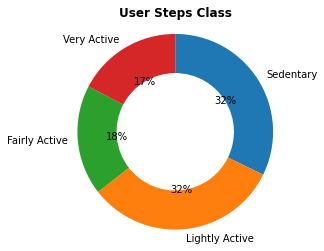

In [9]:
conditions=[dailyactivities.TotalSteps <5000,(dailyactivities.TotalSteps >= 5000) & (dailyactivities.TotalSteps <7500),
            (dailyactivities.TotalSteps >= 7500) & (dailyactivities.TotalSteps <10000),dailyactivities.TotalSteps >= 10000]
choices = ['Sedentary','Lightly Active','Fairly Active','Very Active']

classes = np.select(conditions,choices)
dailyactivities['Steps Class'] = classes
count = dailyactivities['Steps Class'].value_counts()
plt.pie(count,labels=choices,autopct='%.0f%%',startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('User Steps Class',fontweight = 'bold')
plt.axis('square')
plt.show()

## Which BMI class covers the most distance and steps?

The above visualisations show the BMI class against the average distance covered and the average steps and shows that the users who were overweight have taken the most steps(~14000 steps) and covered the most distance but the women who are obesed have taken by far the least steps(<2000 steps) and covered the least distance as expected

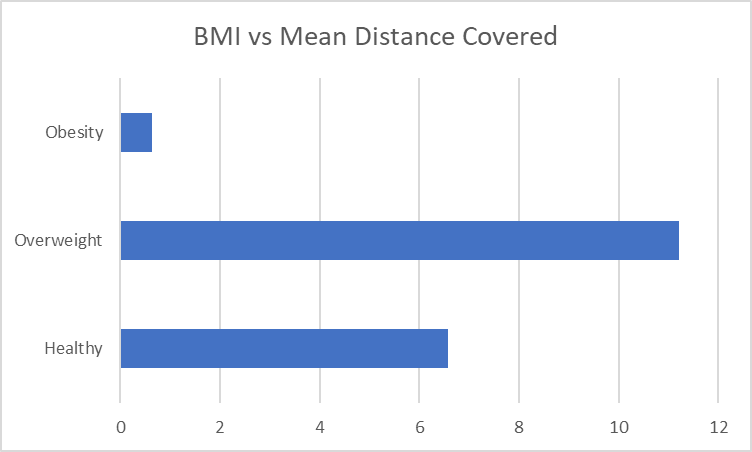 

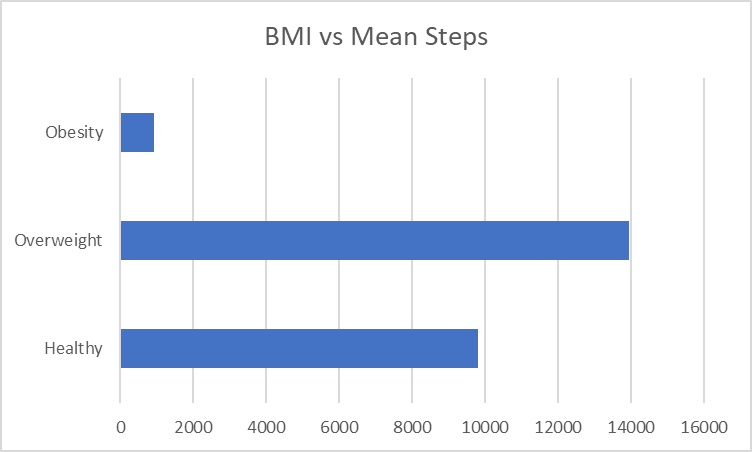

## Conclusion
These are the recommended steps of action to take to improve the Bellabeat user experience:
- Introduction of Target Steps plans in order to reduce the percentage of the sedentary minutes,it basically involves having different plans each categorised based on the amount of calories intended to be burnt per day and formulating the amount of steps required to attain that calories loss
- Daily notifications to remind users to take their targeted steps per day because from the viz we can see despite the encouraging numbers from the Overweight BMI class, the obesed women numbers arent really encouraging so constantly encouraging them to take an adequate number of steps can go a long way
- Daily health tips can also be beneficial to Bellabeat users and can go a long way in improving their heart rates

In [14]:
!jupyter nbconvert Bellabeat.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Bellabeat.ipynb to slides
[NbConvertApp] Writing 758151 bytes to Bellabeat.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\anaconda3\lib\site-pa